<a href="https://colab.research.google.com/github/Deleon57/EDAB6808/blob/main/ASMT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This block installs and imports the required libraries for data handling, visualization,  and building Bayesian Networks using pgmpy.


In [3]:
# --- Install & Import Libraries ---
!pip install pgmpy pandas openpyxl matplotlib networkx

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch


# This block loads the Excel dataset into a DataFrame and displays its dimensions and the first few rows to inspect the structure of the data.


In [6]:
# Load the Excel dataset
df = pd.read_excel("Subsistence Retail Consumer Data.xlsx")

# Quick look at the data
print(df.shape)
print(df.head())

(281, 41)
   Gender A1  Marital Status A2  Age A3  Employment Status A4  \
0          3                  1       4                     1   
1          3                  3       5                     1   
2          2                  2       4                     2   
3          1                  1       3                     1   
4          3                  1       2                     2   

   Level of Education A5  Regular Customer A6  Shopping frequency A7  E1  E2  \
0                      4                    2                      3   3   2   
1                      4                    1                      1   3   3   
2                      2                    2                      2   3   4   
3                      3                    2                      1   3   2   
4                      2                    2                      3   2   4   

   E3  ...  CT5  CT6  CT7  PV1  PV2  PV3  PI1  PI2  PI3  PI4  
0   4  ...    3    2    4    2    4    4    3    4    4

# This block learns the Bayesian Network structure using Hill Climb Search and then builds the network by creating edges between the discovered variables.


In [7]:
# Hill Climb Search for DAG
hc = HillClimbSearch(df)
best_model = hc.estimate()

# Build Bayesian Network
model = DiscreteBayesianNetwork(best_model.edges())
print("Edges: ", model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges:  [('Marital Status A2', 'Age A3'), ('Marital Status A2', 'Gender A1'), ('Marital Status A2', 'Regular Customer A6'), ('Employment Status A4', 'Age A3'), ('Level of Education A5', 'Employment Status A4'), ('E1', 'E2'), ('E1', 'E3'), ('E2', 'PS1'), ('E2', 'Marital Status A2'), ('PS1', 'PS2'), ('PS1', 'PS3'), ('C2', 'C1'), ('C2', 'Regular Customer A6'), ('PE1', 'Level of Education A5'), ('PE2', 'PE3'), ('PE3', 'C2'), ('PE5', 'PE6'), ('PE5', 'PE4'), ('PE6', 'E4'), ('PPQ1', 'PPQ3'), ('PPQ1', 'PE2'), ('PPQ1', 'PPQ4'), ('PPQ1', 'PV1'), ('PPQ3', 'PPQ2'), ('PPQ3', 'CT5'), ('PPQ4', 'Shopping frequency A7'), ('PPQ2', 'CT7'), ('CT5', 'CT1'), ('CT5', 'CT6'), ('CT1', 'CT3'), ('CT1', 'E1'), ('CT1', 'PE1'), ('CT3', 'CT4'), ('CT3', 'C3'), ('CT4', 'CT2'), ('CT6', 'PE5'), ('PV3', 'PPQ1'), ('PI1', 'PV3'), ('PI2', 'PI4'), ('PI4', 'PI1'), ('PI4', 'PV2'), ('PI3', 'PI2')]


# This block prints out the nodes (variables) and edges (relationships) in the Bayesian Network to verify its structure.


In [33]:
print("Nodes:", model.nodes())
print("Edges:", model.edges())

Nodes: ['Type of Customer', 'Empathy', 'Convenience', 'Perceived Value', 'Price Sensitivity', 'Purchase Intention', 'Physical Environment', 'Perceived Product Quality', 'Customer Trust']
Edges: [('Type of Customer', 'Empathy'), ('Convenience', 'Perceived Value'), ('Perceived Value', 'Purchase Intention'), ('Price Sensitivity', 'Purchase Intention'), ('Physical Environment', 'Perceived Value'), ('Perceived Product Quality', 'Perceived Value'), ('Customer Trust', 'Purchase Intention')]


In [43]:
#begin hierso
model = DiscreteBayesianNetwork([
    ('Type of Customer', 'Empathy'),
    ('Type of Customer', 'Convenience'),
    ('Type of Customer', 'Physical Environment'),
    ('Type of Customer', 'Customer Trust'),

    ('Empathy', 'Perceived Value'),
    ('Convenience', 'Perceived Value'),
    ('Physical Environment', 'Perceived Value'),
    ('Perceived Product Quality', 'Perceived Value'),

    ('Customer Trust', 'Purchase Intention'),
    ('Price Sensitivity', 'Purchase Intention'),
    ('Perceived Value', 'Purchase Intention')
])


In [44]:
# Create construct-level variables by averaging items
df['Empathy'] = df[['E1','E2','E3','E4']].mean(axis=1)
df['Convenience'] = df[['C1','C2','C3']].mean(axis=1)
df['Price Sensitivity'] = df[['PS1','PS2','PS3']].mean(axis=1)
df['Physical Environment'] = df[['PE1','PE2','PE3','PE4','PE5','PE6']].mean(axis=1)
df['Perceived Product Quality'] = df[['PPQ1','PPQ2','PPQ3','PPQ4']].mean(axis=1)
df['Customer Trust'] = df[['CT1','CT2','CT3','CT4','CT5','CT6','CT7']].mean(axis=1)
df['Perceived Value'] = df[['PV1','PV2','PV3']].mean(axis=1)
df['Purchase Intention'] = df[['PI1','PI2','PI3','PI4']].mean(axis=1)

# Add Type of Customer (assuming coded 1=Regular, 2=Need-based in the dataset)
df['Type of Customer'] = df['Regular Customer A6'].replace({1: "Regular", 2: "Need-based"})


In [45]:
model.fit(df, estimator=BayesianEstimator, prior_type="BDeu")

# Print CPDs
for cpd in model.get_cpds():
    print(cpd)


+------------------------------+---------+
| Type of Customer(Need-based) | 0.18007 |
+------------------------------+---------+
| Type of Customer(Regular)    | 0.81993 |
+------------------------------+---------+
+------------------+------------------------------+---------------------------+
| Type of Customer | Type of Customer(Need-based) | Type of Customer(Regular) |
+------------------+------------------------------+---------------------------+
| Empathy(1.0)     | 0.0032362459546925572        | 0.022032693674484724      |
+------------------+------------------------------+---------------------------+
| Empathy(1.5)     | 0.08090614886731394          | 0.0007107320540156362     |
+------------------+------------------------------+---------------------------+
| Empathy(2.0)     | 0.06148867313915859          | 0.051883439943141436      |
+------------------+------------------------------+---------------------------+
| Empathy(2.25)    | 0.0032362459546925572        | 0.00923951670

In [46]:
# 1. Map Likert text responses (if present) into numbers
likert_map = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

for col in ['E1','E2','E3','E4',
            'C1','C2','C3',
            'PS1','PS2','PS3',
            'PE1','PE2','PE3','PE4','PE5','PE6',
            'PPQ1','PPQ2','PPQ3','PPQ4',
            'CT1','CT2','CT3','CT4','CT5','CT6','CT7',
            'PV1','PV2','PV3',
            'PI1','PI2','PI3','PI4']:
    df[col] = df[col].replace(likert_map)   # if already numeric, this does nothing
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Construct averages
df['Empathy'] = df[['E1','E2','E3','E4']].mean(axis=1)
df['Convenience'] = df[['C1','C2','C3']].mean(axis=1)
df['Price Sensitivity'] = df[['PS1','PS2','PS3']].mean(axis=1)
df['Physical Environment'] = df[['PE1','PE2','PE3','PE4','PE5','PE6']].mean(axis=1)
df['Perceived Product Quality'] = df[['PPQ1','PPQ2','PPQ3','PPQ4']].mean(axis=1)
df['Customer Trust'] = df[['CT1','CT2','CT3','CT4','CT5','CT6','CT7']].mean(axis=1)
df['Perceived Value'] = df[['PV1','PV2','PV3']].mean(axis=1)
df['Purchase Intention'] = df[['PI1','PI2','PI3','PI4']].mean(axis=1)

# 3. Discretize into categories
def discretize(series):
    return pd.cut(series, bins=[0,2.5,3.5,5], labels=['Low','Medium','High'])

for col in ['Empathy','Convenience','Price Sensitivity','Physical Environment',
            'Perceived Product Quality','Customer Trust','Perceived Value','Purchase Intention']:
    df[col] = discretize(df[col])

# 4. Add Type of Customer
df['Type of Customer'] = df['Regular Customer A6'].replace({1:"Regular", 2:"Need-based"})


In [47]:
model.fit(df, estimator=BayesianEstimator, prior_type="BDeu")

for cpd in model.get_cpds():
    print(cpd)


+------------------------------+---------+
| Type of Customer(Need-based) | 0.18007 |
+------------------------------+---------+
| Type of Customer(Regular)    | 0.81993 |
+------------------------------+---------+
+------------------+------------------------------+---------------------------+
| Type of Customer | Type of Customer(Need-based) | Type of Customer(Regular) |
+------------------+------------------------------+---------------------------+
| Empathy(High)    | 0.21035598705501618          | 0.5152807391613362        |
+------------------+------------------------------+---------------------------+
| Empathy(Low)     | 0.21035598705501618          | 0.1144278606965174        |
+------------------+------------------------------+---------------------------+
| Empathy(Medium)  | 0.5792880258899676           | 0.3702914001421464        |
+------------------+------------------------------+---------------------------+
+---------------------+-----+---------------------------+
| Type 

In [48]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

# Example: If Price Sensitivity = High and Customer Trust = Medium,
# what is the predicted Purchase Intention?
query = inference.map_query(
    variables=['Purchase Intention'],
    evidence={'Price Sensitivity':'High', 'Customer Trust':'Medium'}
)
print("Predicted Purchase Intention:", query)


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Predicted Purchase Intention: {'Purchase Intention': 'High'}


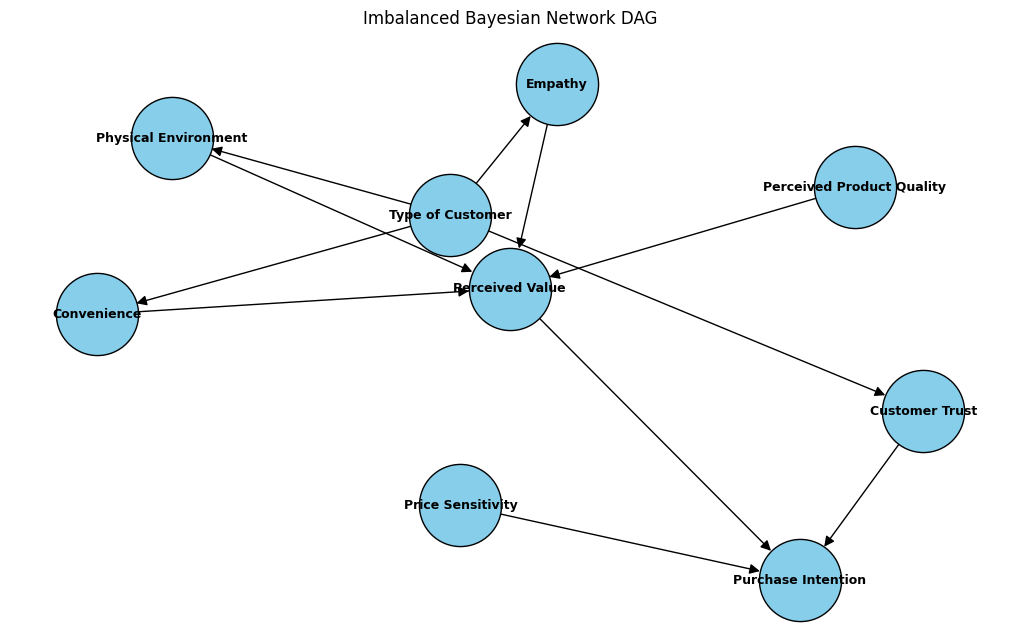

In [49]:
# Convert pgmpy model to a networkx DiGraph
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

# Plot the DAG
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)  # deterministic layout
nx.draw(G, pos, with_labels=True, node_size=3500, node_color="skyblue",
        font_size=9, font_weight="bold", edgecolors="black", arrowsize=15)
plt.title("Imbalanced Bayesian Network DAG")
plt.show()
